<a href="https://colab.research.google.com/github/CharithaGongati/quiz-programming/blob/main/quizprogram1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
11/11 [==============================] - 10s 35ms/step - loss: 0.1715
Epoch 2/100
11/11 [==============================] - 0s 37ms/step - loss: 0.0529
Epoch 3/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0411
Epoch 4/100
11/11 [==============================] - 1s 47ms/step - loss: 0.0350
Epoch 5/100
11/11 [==============================] - 1s 46ms/step - loss: 0.0327
Epoch 6/100
11/11 [==============================] - 1s 53ms/step - loss: 0.0312
Epoch 7/100
11/11 [==============================] - 1s 52ms/step - loss: 0.0288
Epoch 8/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0264
Epoch 9/100
11/11 [==============================] - 0s 30ms/step - loss: 0.0237
Epoch 10/100
11/11 [==============================] - 0s 32ms/step - loss: 0.0202
Epoch 11/100
11/11 [==============================] - 0s 33ms/step - loss: 0.0154
Epoch 12/100
11/11 [==============================] - 0s 43ms/step - loss: 0.0093
Epoch 13/100
11/11 [====

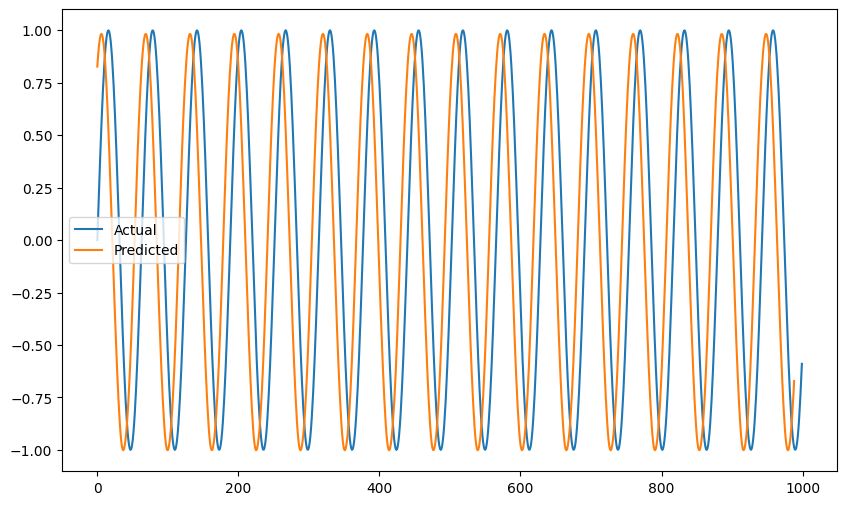

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your time series dataset
# For this example, let's use a simple sine wave
data = np.sin(np.arange(0, 100, 0.1))

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Prepare the data for LSTM model
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Reshape input data to be 3D [samples, time steps, features] as required by LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict))
test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(data, label='Actual')
plt.plot(np.concatenate([train_predict, test_predict]), label='Predicted')
plt.legend()
plt.show()